<a href="https://colab.research.google.com/github/ShauryaGupta18/Projects/blob/main/EDAprojectC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Python Project**

- Shaurya Gupta (25BCE0807)
- Arush Chaudhary (25BCE0754)
- Chris Denis Rodrigues (25BCE0787)

---



This project presents an **Exploratory Data Analysis (EDA)** of major Indian stocks, uncovering key market patterns, trends, and correlations over time. It examines price movements, volatility, trading volumes, and sector performance to understand market behavior. The analysis provides data-driven insights into stock dynamics, risk factors, and investor sentiment within the Indian equity landscape.
Key components->

*   Basic data visualization
*   Volume-price relationship
*   Seasonal trends
*   Correlation with nifty
*   Portfolio Diversification













---

#**Libraries used**
*   yfinance-> Yahoo finance data downloader , downloads financial data from Yahoo finance.
*   pandas-> Data Manipulation and Analysis
*   Seaborn-> Stastical data visualization
*   matplotlib.pyplot -> Basic Plotting Library
---

#**Stocks**
- (.ns means it is on NSE)
- INFY.NS - Infosys
- HDFCBANK.NS - HDFC Bank
- RELIANCE.NS - Reliance Industries
- HINDUNILVR.NS - Hindustan Unilever
- SUNPHARMA.NS - Sun Pharmaceutical
- TATAMOTORS.NS - Tata Motors
- ^NSEI - Nifty 50 Index (benchmark)

---

#**Data cleaning and Processing**
- Missing values are handled
- returns and cumulative returns store trends to plot performance
- cumprod() -> multiplies values cumulatively -> essential for compounding returns in finance.










In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tickers = ['INFY.NS', 'HDFCBANK.NS', 'RELIANCE.NS', 'HINDUNILVR.NS', 'SUNPHARMA.NS', 'TATAMOTORS.NS', '^NSEI']
data = yf.download(tickers, start='2019-01-01', end='2024-12-31')

returns = data.pct_change().dropna()
cumulative_returns = (1 + returns).cumprod()


/tmp/ipython-input-3284688119.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  7 of 7 completed
/tmp/ipython-input-3284688119.py:9: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


# **Basic Data Visualization**
- sata is our data excluding the index...{method to select feilds}
- first bracket specifies the parameter to be considered
- second bracket specifies the time range..or the x axis range
- alpha function decides the transparency of grid lines


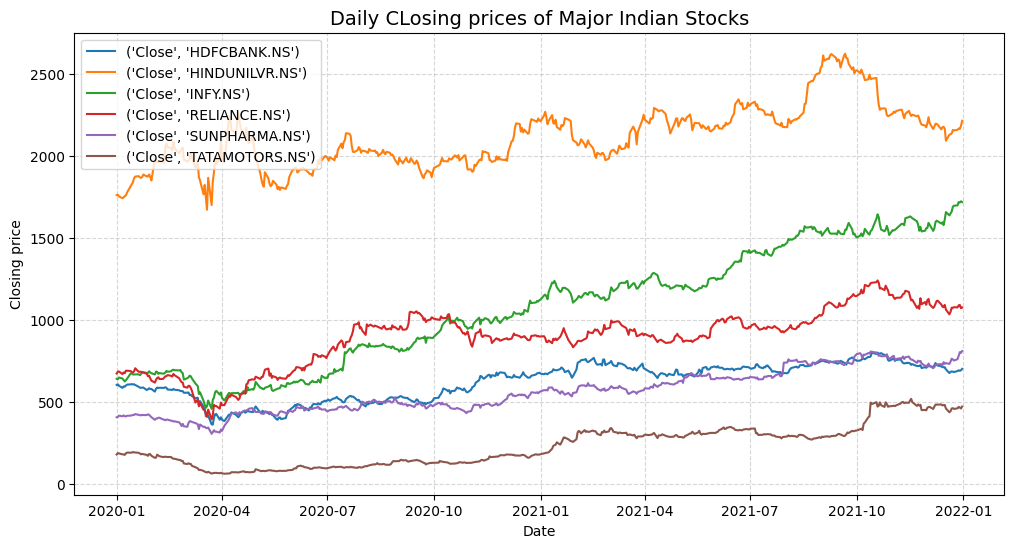

In [ ]:
sata=data.iloc[:,:6]
plt.figure(figsize=(12, 6))
plt.plot(sata['Close']['2020-01-01':'2022-01-01'])
plt.title("Daily CLosing prices of Major Indian Stocks", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.legend(sata.columns, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# **Volume Price Relationship**

---


#*Code aspect*
- A 12x8 inch window is created for clear view.
- Takes the volume data and rearranges it to match the returns index,Keeps only the dates that exist in price_returns.index.This ensures both have the same trading days.
- return containing *decimal percentages* is plotted against volume.
- red line clearly separates positive returns from negative returns.
- blue line separates high volume days(right side) from low volume days (left side).
- it is calculated by taking average of averages of all volumes of stocks traded.
- quadrant names are written on graph , the posn of the label is calculated throuhg certain formula from the graph
---


#*Financial aspect*
- This scatter plot is fundamental technical analysis that every professional trader and analyst uses daily to gauge market sentiment and trend health.


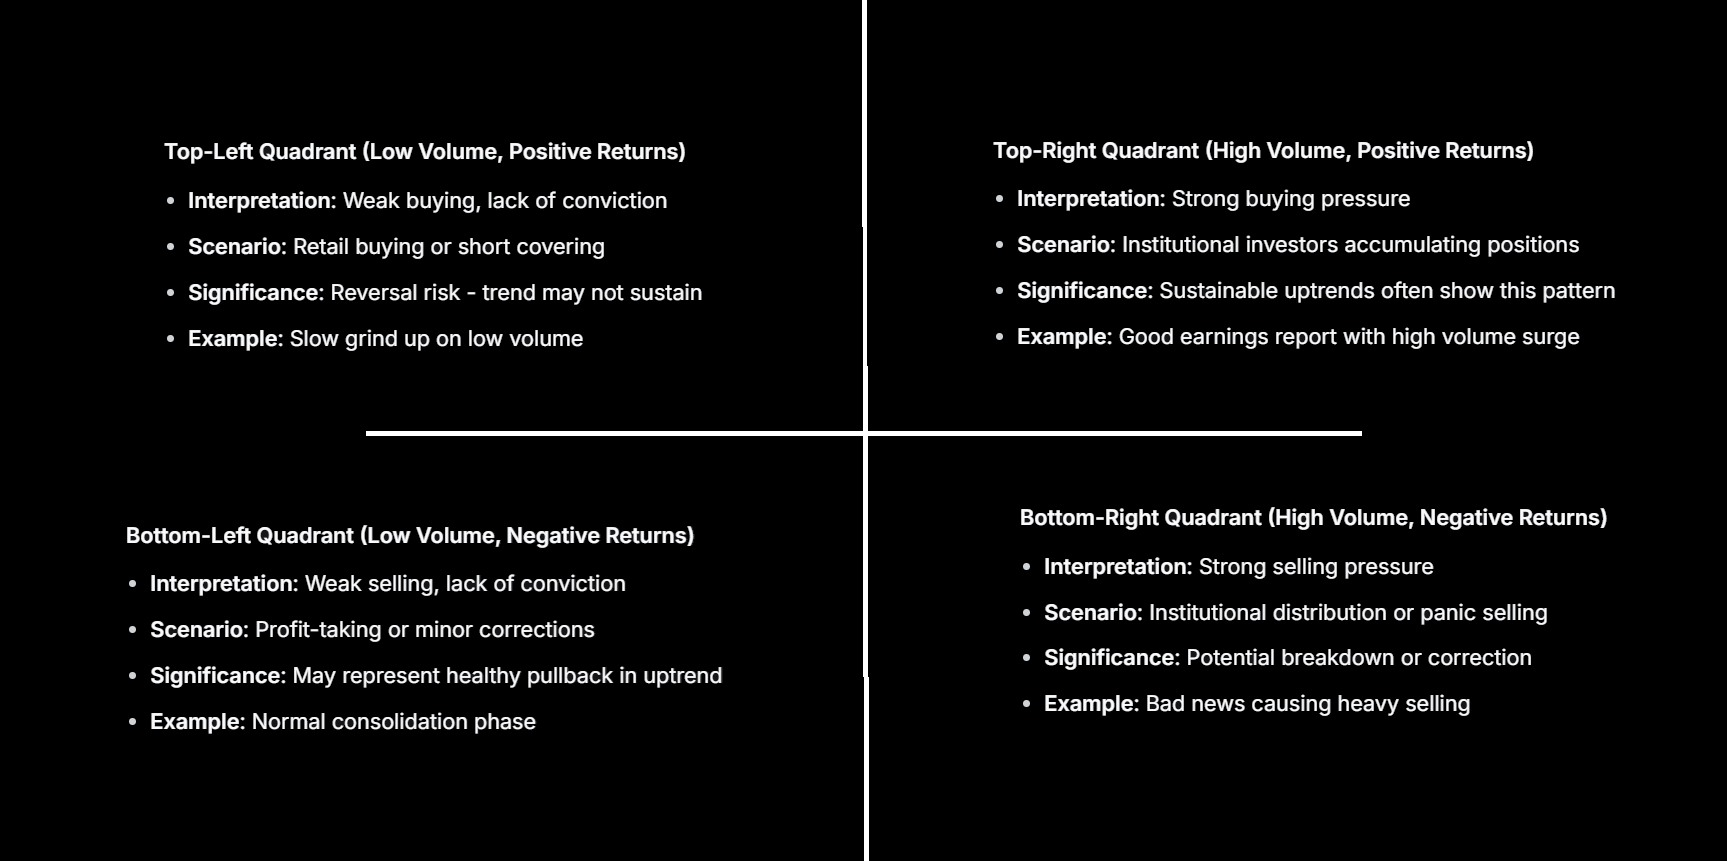



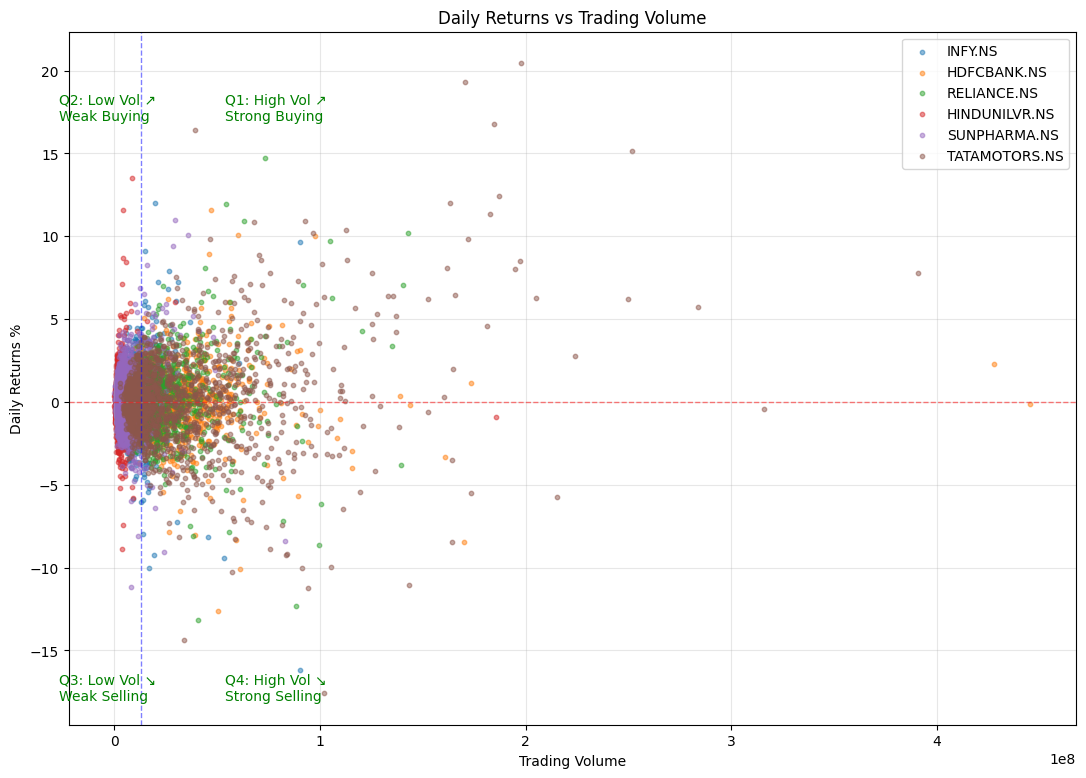


Bullish Signal if quadrant1>quadrant4

        Stock  Q1 %  Q2 %  Q3 %  Q4 % Bullish Signal
      INFY.NS 18.4% 34.1% 32.1% 15.3%            YES
  HDFCBANK.NS 19.6% 32.3% 31.6% 16.5%            YES
  RELIANCE.NS 18.4% 33.1% 33.9% 14.6%            YES
HINDUNILVR.NS 14.0% 35.3% 35.6% 15.1%             NO
 SUNPHARMA.NS 17.6% 34.7% 32.7% 14.8%            YES
TATAMOTORS.NS 18.1% 32.9% 33.8% 14.9%            YES


In [ ]:
price_returns = returns['Close']
volume_data = data['Volume']


volume_data_aligned = volume_data.reindex(price_returns.index)


plt.figure(figsize=(13, 9))
for stock in tickers[:-1]:
  plt.scatter(volume_data_aligned[stock], price_returns[stock]*100,alpha=0.5, label=stock, s=10)

plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=volume_data_aligned.mean().mean(), color='blue', linestyle='--', alpha=0.5, linewidth=1)
plt.xlabel('Trading Volume')
plt.ylabel('Daily Returns %')
plt.title('Daily Returns vs Trading Volume')
plt.legend()
plt.grid(True, alpha=0.3)

avg_volume_all = volume_data[tickers[:-3]].mean().mean()
plt.text(avg_volume_all * 4, 17, 'Q1: High Vol ↗️\nStrong Buying', fontsize=10, color='green')
plt.text(avg_volume_all * -2, 17, 'Q2: Low Vol ↗️\nWeak Buying', fontsize=10, color='green')
plt.text(avg_volume_all * -2, -18, 'Q3: Low Vol ↘️\nWeak Selling', fontsize=10, color='green')
plt.text(avg_volume_all * 4, -18, 'Q4: High Vol ↘️\nStrong Selling', fontsize=10, color='green')

plt.show()

quadrant_summary = []

for stock in tickers[:-1]:
    if stock in price_returns.columns and stock in volume_data.columns:
        volume_aligned = volume_data[stock].reindex(price_returns.index)
        returns_aligned = price_returns[stock]

        valid_data = pd.DataFrame({'volume': volume_aligned, 'returns': returns_aligned}).dropna()

        if len(valid_data) > 0:
            avg_volume = valid_data['volume'].mean()

            q1 = len(valid_data[(valid_data['volume'] > avg_volume) & (valid_data['returns'] > 0)])
            q2 = len(valid_data[(valid_data['volume'] < avg_volume) & (valid_data['returns'] > 0)])
            q3 = len(valid_data[(valid_data['volume'] < avg_volume) & (valid_data['returns'] < 0)])
            q4 = len(valid_data[(valid_data['volume'] > avg_volume) & (valid_data['returns'] < 0)])

            total = len(valid_data)

            quadrant_summary.append({
                'Stock': stock,
                'Q1 %': f"{q1/total*100:.1f}%",
                'Q2 %': f"{q2/total*100:.1f}%",
                'Q3 %': f"{q3/total*100:.1f}%",
                'Q4 %': f"{q4/total*100:.1f}%",
                'Bullish Signal': 'YES' if q1 > q4 else 'NO'
            })
print("")
print("Bullish Signal if quadrant1>quadrant4")
print("")
quadrant_df = pd.DataFrame(quadrant_summary)
print(quadrant_df.to_string(index=False))

# **Seasonal/Monthly Trends**
---
#*Code Aspect*
- the monthly returns is calculated as=> Gets closing prices for all stocks except the last one --> groups data by month --> takes the last trading day of each month --> calculates percentage change from previous month --> Result: DataFrame with monthly returns for each stock
- *monthly_avg* stores the Calculates average return for each month across all years
- All these are compared and then the minimum and maximum are returned
---
#*Financial Aspect*
- Shows if certain months consistently have positive/negative returns
- Helps identify seasonal patterns like "January effect" or "summer slump"




/tmp/ipython-input-3988095044.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data['Close'][tickers[:-1]].resample('M').last().pct_change()


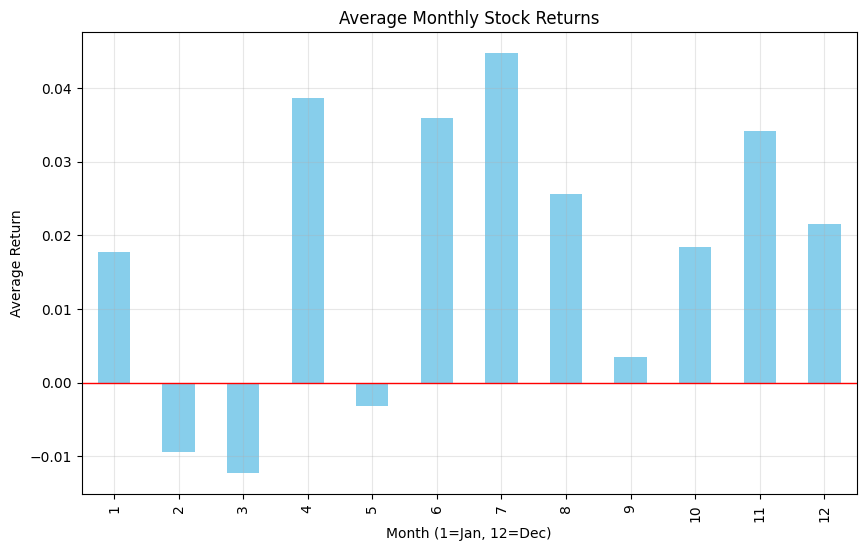

Average Monthly Returns (%):
Month 1: 1.78%
Month 2: -0.94%
Month 3: -1.23%
Month 4: 3.86%
Month 5: -0.32%
Month 6: 3.60%
Month 7: 4.47%
Month 8: 2.56%
Month 9: 0.35%
Month 10: 1.84%
Month 11: 3.42%
Month 12: 2.16%

Best Month: 7 (4.47%)
Worst Month: 3 (-1.23%)


In [ ]:
monthly_returns = data['Close'][tickers[:-1]].resample('M').last().pct_change()

monthly_avg = monthly_returns.groupby(monthly_returns.index.month).mean()

plt.figure(figsize=(10, 6))
monthly_avg.mean(axis=1).plot(kind='bar', color='skyblue')
plt.axhline(y=0, color='red', linestyle='-', linewidth=1)
plt.title('Average Monthly Stock Returns')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Average Return')
plt.grid(True, alpha=0.3)
plt.show()

print("Average Monthly Returns (%):")
for month, ret in enumerate(monthly_avg.mean(axis=1), 1):
    print(f"Month {month}: {ret:.2%}")

best_month = monthly_avg.mean(axis=1).idxmax()
worst_month = monthly_avg.mean(axis=1).idxmin()
print(f"\nBest Month: {best_month} ({monthly_avg.mean(axis=1)[best_month]:.2%})")
print(f"Worst Month: {worst_month} ({monthly_avg.mean(axis=1)[worst_month]:.2%})")


# **Correlation with Nifty**


---
#*Code Aspect*
- cumulative returns of stocks are plotted against the index to easily spot their performance
- whichever stock outperforms the index .i.e. has a greater normalized value is returned at the end


---
#*Financial Aspect*
- simply means-> "If I invested ₹100 in each stock and Nifty in 2019, which ones would have made more money than the market by 2025?"




<Figure size 1000x600 with 0 Axes>

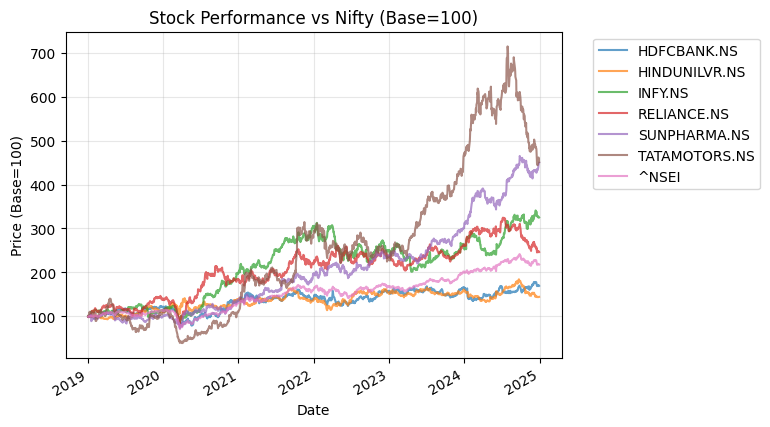


Stocks that beat Nifty:
✓ INFY.NS: 325 vs Nifty: 218
✓ RELIANCE.NS: 246 vs Nifty: 218
✓ SUNPHARMA.NS: 450 vs Nifty: 218
✓ TATAMOTORS.NS: 451 vs Nifty: 218


In [ ]:
nifty_returns = returns['Close']['^NSEI']
stock_returns = returns['Close'][tickers[:-1]]

plt.figure(figsize=(10, 6))
normalized = (1 + returns['Close']).cumprod() * 100
normalized.plot(alpha=0.7)
plt.title('Stock Performance vs Nifty (Base=100)')
plt.ylabel('Price (Base=100)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

nifty_final = normalized['^NSEI'].iloc[-1]
print(f"\nStocks that beat Nifty:")
for stock in tickers[:-1]:
    stock_final = normalized[stock].iloc[-1]
    if stock_final > nifty_final:
        print(f"✓ {stock}: {stock_final:.0f} vs Nifty: {nifty_final:.0f}")

#**Portfolio Diversification Cases**

---
#*Code Aspect*
- Weights must sum to 1.0 (100% of money allocated)
- Gets growth factors for all stocks->Multiply each stock's growth by its weight-> Adds across stocks for each day-> Converts to actual money values


---
#*Financial Aspect*
- Dived into concept of portfolio diversification
- Helps draw insights on types of investors and their strategies
- Real world investement lessons->
   - Diversification works
   - Heavy bets can pay off big or lose big
   - Time in market
   - No perfect strategy



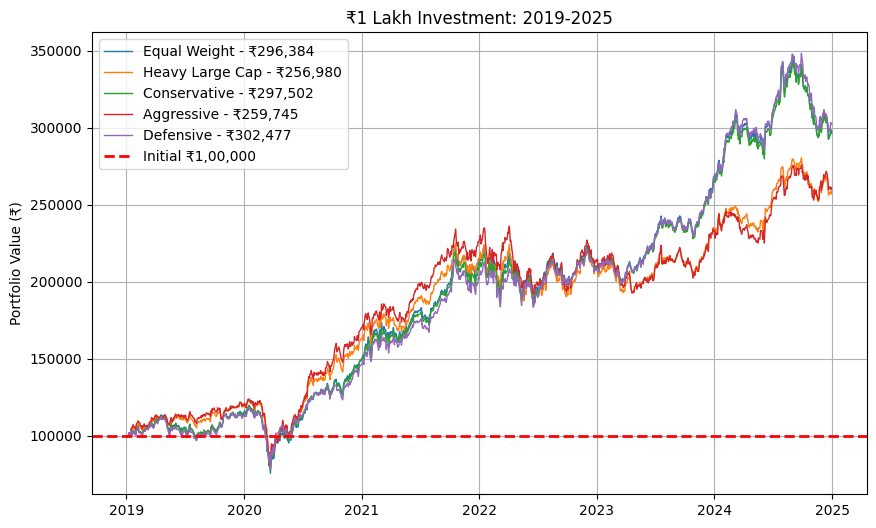


FINAL RESULTS:
Equal Weight: ₹296,384 (Profit: ₹196,384)
Heavy Large Cap: ₹256,980 (Profit: ₹156,980)
Conservative: ₹297,502 (Profit: ₹197,502)
Aggressive: ₹259,745 (Profit: ₹159,745)
Defensive: ₹302,477 (Profit: ₹202,477)


In [ ]:
initial=100000

strategies = {
    'Equal Weight': [0.166, 0.166, 0.166, 0.166, 0.166, 0.166],  # All equal
    'Heavy Large Cap': [0.3, 0.3, 0.2, 0.1, 0.05, 0.05],  # Focus on INFY, HDFC, RELIANCE
    'Conservative': [0.15, 0.15, 0.15, 0.2, 0.2, 0.15],  # Balanced
    'Aggressive': [0.4, 0.3, 0.2, 0.05, 0.03, 0.02],  # Heavy on top performers
    'Defensive': [0.1, 0.1, 0.15, 0.25, 0.25, 0.15],  # Heavy on stable stocks
}

plt.figure(figsize=(10, 6))

close_cumulative_returns = cumulative_returns['Close']

for name, weights in strategies.items():
    growth = initial * (close_cumulative_returns[tickers[:-1]] * weights).sum(axis=1)
    final = growth.iloc[-1]
    plt.plot(growth.index, growth, label=f'{name} - ₹{final:,.0f}', linewidth=1)

plt.axhline(y=initial, color='red', linestyle='--', linewidth=2, label='Initial ₹1,00,000')
plt.title('₹1 Lakh Investment: 2019-2025')
plt.ylabel('Portfolio Value (₹)')
plt.legend()
plt.grid(True)
plt.show()

# Simple results
print("\nFINAL RESULTS:")
for name, weights in strategies.items():
    final = initial * (close_cumulative_returns[tickers[:-1]] * weights).sum(axis=1).iloc[-1]
    profit = final - initial
    print(f"{name}: ₹{final:,.0f} (Profit: ₹{profit:,.0f})")